# Boston Housing Price

Pada pembelajaran ini akan dilakukan proses Regression yaitu untuk melakukan prediksi harga rumah menggunakan beberapa cara yaitu : 
1. Simple Linear Regression
2. Multiple Linear Regression
3. Polynomial Linear Regression
4. KNN

## Load Dataset

Langkah pertama yang harus dilakukan adalah dengan melakukan load dataset. Cara untuk mengakses dataset: Kita dapat mengakses sebuah dataset dengan mengimport dataset terebut.

Dataset yang akan digunakan kali ini adalah dataset Boston Housing Price. Berikut cara mengimport dataset dari sklearn:

In [3]:
from sklearn.datasets import load_boston
# melakukan load dataset 

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

Selanjutnya setelah mengimport dataset yang akan digunakan, akan dilihat keys apa saja yang terdapat pada dataset boston housing price. Berikut caranya:

In [4]:
boston.keys()
#untuk mendata dictionary apa saja yang dimiliki oleh iris dataset

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Isi keys dictionary dari boston dataset adalah:

data = akan berasosiasi dengan data-data features
target = akan berasosiasi dengan data-data target
features_name = akan berkorelasi dengan nama / label untuk setiap featuresnya
DESCR = merupakan kependekan dari description, untuk mengakses deskripsi dari datasetnya.
filename = akan berasosiasi dengan lokasi dari file dataset yang di load

Setelah melihat dictionary apa saja yang terdapat pada dataset boston, kemudian akan dilihat deskripsi dari dataset boston, dengan menggunakan:

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Dari hasil deskripsi diatas dapat diketahui bahwa artibute akan menjadi features.

Dan untuk mempermudah mengetahui features yang ada maka akan ditampilkan features name dari dataset boston, dengan cara:

In [6]:
feature_names = boston.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Menampilkan Boston Dataset sebagai pandas Dataframe

In [8]:
from sklearn import datasets
import pandas as pd

boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Setelah mengetahui features apa saja yang ada pada Boston dataset kemudian akan dilakukan persiapan terhadap dataset yang dimiliki.
Persiapan dilakukan dengan membagi dataset menjadi Training Set dan Testing Set.

In [7]:
X = boston.data
y = boston.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

## Simple Linear Regression

Simple Linear Regression merupakan model machine learning paling sedernaha dan paling pertama diajarkan pada kelas machine learning.

Simple Linear Regression memodelkan hubungan antara sebuah response variable dengan sebuah explanatory variable sebagai suatu garis lurus (linear). Simple Linear Regression ini juga masih digunakan untuk memprediksi suatu nilai.

Referensi: https://en.wikipedia.org/wiki/Simple_linear_regression

### Mempersiapkan Dataset

Langkah pertama yang dilakukan adalah menyiapkan dataset yang akan digunakan. Dari dataset yang digunakan terdapat berbagai macam features yang dapat digunakan, dan yang saya gunakan kali ini adalah DIS (weighted distances to five Boston employment centres).

In [14]:
import pandas as pd

rumah = {'dis': [4.0900, 4.9671, 4.9671, 6.0622, 6.0622], 
         'harga': [24.0, 21.6, 34.7, 33.4, 36.2]}

rumah_df = pd.DataFrame(rumah)

rumah_df

,dis,harga
0,4.0900,24.0
1,4.9671,21.6
2,4.9671,34.7
3,6.0622,33.4
4,6.0622,36.2


Dapat dilihat bahwa dataset yang dimiliki, terdiri 2 buah kolom yaitu kolom dis dan kolom harga.

Dalam pembelajaran ini, akan dibuat sebuah model machine learning sederhana yang dapat digunakan untuk memprediksi harga rumah bila diketahui disnya. Dapat diambil kesimpulan bahwa nilai dis akan berperan sebagai features, dan nilai harga akan berperan sebagai target.

Selanjutnya akan dilakukan visualisasi data terhadap data rumah yang dimiliki.

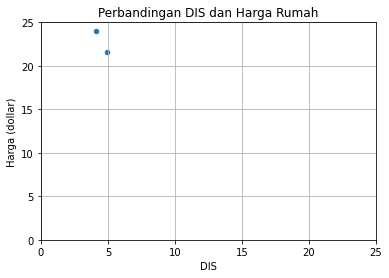

In [19]:
import matplotlib.pyplot as plt
# mengimport matplotlib sebagai plt

rumah_df.plot(kind='scatter', x='dis', y='harga')
# untuk membuat scatter plot

plt.title('Perbandingan DIS dan Harga Rumah')
# untuk memberikan title pada plot

plt.xlabel('DIS')
# untuk memberikan label pada sumbu x

plt.ylabel('Harga (dollar)')
# untuk memberikan label pada sumbu y

plt.xlim(0, 25)
# untuk mengatur jangkauan sumbu x

plt.ylim(0, 25)
# untuk mengatur jangkauan sumbu y

plt.grid(True)
# untuk menampilkan gridnya

plt.show()
# untuk menampilkan shownya

### Simple Linear Regression Model

#### Penyesuaian Dataset

Sebelumnya dilakukan terlebih dahulu penyesuaian terhadap dataset yang dimiliki, penyesuaian yang dilakukan adalah : Mengelompokkan features dan target kedalam 2 variable terpisah, dan juga dilakukan koncersi struktur data dari pandas dataframe menjadi numpy array.

**Caranya:**

1. import numpy as np, untuk mengimport numpy
2. Menyeleksi dis (features) kemudian dikonversikan menjadi suatu numpy array, yang ditampung dalam sebuah variable x. 
3. Variable x ini nanti akan dikenal / diketahui sebagai variable features.
4. Mengkonversi nilai harga kemudian ditampung dalam variable y. Variable y ini akan dikenal / diketahui sebagai variable target.

In [20]:
import numpy as np
# untuk mengimport numpy

X = np.array(rumah_df['dis'])
# mengkonversi nilai diameter menjadi numpy array, kemudian ditampung dalam variable x

y = np.array(rumah_df['harga'])
# mengkonversi nilai harga menjadi numpy array, kemudian ditampung dalam variable y

print(f'X: {X}')
# print variable x

print(f'y: {y}')
# print variable y

X: [4.09   4.9671 4.9671 6.0622 6.0622]
y: [24.  21.6 34.7 33.4 36.2]


x berisikan kumpulan nilai features, dan y berisikan kumpulan nilai target.

Jika diperhatikan hasil yang ditampilkan variable x yang digunakan untuk menampung nilai features hanya terdiri dari 1 dimensi saja, sedangkan dalam pembelajaran sebelumnya model machine learning pada sklearn membutuhkan sekumpulan nilai features yang ditampung dalam suatu array 2 dimensi.

Oleh karena itu perlu dilakukan proses reshaping terhadap array yang digunakan untuk menampung nilai features (x).

**Cara Melakukan Reshaping Array (yang menampung nilai features):**
1. Memanggil x.reshape yang berisikan 2 buah parameter yaitu -1 dan 1.
2. Kemudian ditampilkan hasil dari proses reshaping nya.

In [21]:
X = X.reshape(-1, 1)
# untuk melalukan reshaping

X.shape
# untuk memanggil dimensi hasil dari reshaping

(5, 1)

In [22]:
X
# untuk menampilkan arraynya (isi arraynya)

array([[4.09  ],
       [4.9671],
       [4.9671],
       [6.0622],
       [6.0622]])

**Penjelasan hasil :**

Hasil setelah di reshaping menjadi (5, 1) yang artinya terdiri dari 5 baris dan 1 kolom
Jika dipanggil nilai X nya maka akan terlihat dengan jelas dalam array 2 dimensi tersebut terdapat 5 baris dan 1 kolom
Training Simple Linear Regression Model
Setelah dilakukan reshaping, maka sekarang akan dilakukan training model machine learning dimana model yang dipilih adalah Linear Regression.

**Cara Melakukannya:**

1. Mengimport estimator class nya, dan yang kali ini digunakan adalah Linear Regression. Caranya dengan memanggil from sklearn.linear_model import LinearRegression
2. Membuat objek model dari estimator class dengan memanggil LinnearRegression(). Objek yang terbentuk akan ditampung dalam variable model.
3. Selanjutnya objek model yang sudah terbentuk akan di training dengan memanggil method .fit method .fit ini membutuhkan 2 parameter yaitu sekumpulan nilai features dan sekumpulan nilai target, dan kedua nilai ini telah ditampung ke dalam variable x dan y sebelumnya.

In [23]:
from sklearn.linear_model import LinearRegression
# mengimport class estimatornya yaitu Linear Regression

model = LinearRegression()
# untuk membuat model objeknya

model.fit(X, y)
# untuk mentraining objek model yang sudah dibuat

LinearRegression()

#### Visualisasi Simple Linear Regression Model

Karena model machine learning yang digunakan adalah Linear Model yang dapat dibilang masih sangat sederhana, maka model ini juga dapat divisualisasikan. Karena pada dasarnya linear model yang dihasilkan akan berupa garis lurus.

In [24]:
X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

Setelah mendapatkan nilai x dan y, maka sekarang data yang dimiliki dapat divisulasisasikan.

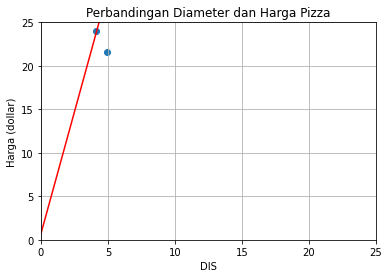

In [25]:
plt.scatter(X, y)
# untuk membuat titik biru pada plot

plt.plot(X_vis, y_vis, '-r')
# untuk membuat garis linear

plt.title('Perbandingan Diameter dan Harga Pizza')
# untuk memberikan judul pada plot

plt.xlabel('DIS')
# untuk memberikan label pada sumbu x

plt.ylabel('Harga (dollar)')
# untuk memberikan label pada sumbu y

plt.xlim(0, 25)
# untuk mengatur jangkauan sumbu x

plt.ylim(0, 25)
# untuk mengatur jangkauan sumbu y

plt.grid(True)
# untuk menampilkan gridnya

plt.show()
# untuk menampilkan plotnya

Garis lurus yang terbentuk pada plot akan memiliki persamaan yang mengacu pada Formula Linear Regression.

**Formula Linear Regression:  𝑦=𝛼+𝛽𝑥**

𝑦 : response variable
𝑥 : explanatory variable
𝛼 : intercept
𝛽 : slope

Dalam Simple Linear Regression terdapat 2 buah parameter yang HARUS dipahami yaitu  𝛼  dan  𝛽 .

𝛼  (Intercept) => Merupakan titik pada sumbu y dimana garis linear yang terbentuk menabrak. Dapat dilihat bahwa pada plot garis linear menabrak suatu titik pada sumbu y, titik itulah yang dinamakan intercept. Atau dapat diartikan juga Intercept adalah nilai pada sumbu y ketika x nya bernilai 0.

𝛽  (Slope) => Nilai slope akan berpengaruh pada tingkat kemiringan dari garis linear yang terbentuk, dimana nilai slope 0 akan menghasilkan garis Horizontal.

Pada SkLearn bisa didapatkan nilai Intercept dan Slope dari model Linear Regression yang sudah ditraining sebelumnya.

**Cara Mendapatkan Nilai Intercept & Slope pada SkLearn:**
1. Menampilkan nilai Intercept dengan memanggil objek model yang dimilki menggunakan model.intercept_
2. Menampilkan nilai slope dengan memanggil objek model yang dimiliki menggunakan model.coef_

In [26]:
print(f'intercept: {model.intercept_}')
# untuk menampilkan nilai intercept

print(f'slope: {model.coef_}')
# untuk menampilkan nilai slope

intercept: 0.7059361715593866
slope: [5.59763502]


Nilai Intercept dan nilai Slope yang diperoleh dari code diatas dilakuakan dengan mengambil parameter yang ada, bukan menghitung secara manual.

#### Perhitungan Nilai Slope dan Nilai Intercept Secara Manual

##### Mencari nilai slope

Nilai slope pada Linear Regression bisa diperoleh dengan memanfaatkan formula berikut:

$\beta = \frac{cov(x, y)}{var(x)}$

Jadi nilai Slope bisa didapatkan dengan melakukan proses pembagian antara nilai covariance dari x dan y, dibagi dengan nilai variance dari x. Dimana x merepresentasikan sekumpulan nilai features sedangkan y merepresentasikan sekumpulan nilai target.

Untuk melakukan proses kalkulasi variance dan covariance lebih baik dilakukan flatten terlebih dahulu (dikembalikan ke bentuk asalnya), karena lebih baik berbentuk 1 dimensi. Untuk melakukan flatten dapat menggunakan method .flatten yang diawali dengan nilai yang ingin kita lakukan flatten.

In [27]:
print(f'X:\n{X}\n')
# untuk melihat nilai x

print(f'X flatten: {X.flatten()}\n')
# melakukan flatten pada nilai x

print(f'y: {y}')
# untuk melihat nilai y

X:
[[4.09  ]
 [4.9671]
 [4.9671]
 [6.0622]
 [6.0622]]

X flatten: [4.09   4.9671 4.9671 6.0622 6.0622]

y: [24.  21.6 34.7 33.4 36.2]


**Berikut adalah tahapan - tahapan untuk mencari nilai Slope:**



##### Variance

Untuk mencari nilai slope perlu untuk menghitung nilai variance nya terlebih dahulu.

**Cara Menghitung Nilai Variance:**
1. Memanggil np.var yang diikuti 2 buah parameter yaitu:
2. Parameter 1 = nilai x yang sudah di flatten kan
3. Parameter 2 = ddof (Dynamic Degrees of Freedom) Hasil perhitungan variance nya akan ditampung pada variable variance_x
4. Kemudian diprint hasilnya untuk ditampilkan

In [28]:
variance_x = np.var(X.flatten(), ddof=1)
# untuk menghitung nilai variance

print(f'variance: {variance_x}')
# menampilkan hasil nilai variance

variance: 0.7057365269999998


##### Covariance


Setelah menghitung nilai variance, maka perlu juga dilakukan perhitungan terhadap nilai covariance sebelum mencari nilai slope.

**Penjelasan Code:**
1. Memanggil np.cov yang diikuti 2 buah parameter yaitu:
   * Parameter 1 = nilai x yang sudah di flatten kan
   * Parameter 2 = nilai y
2. Jika sudah dijalankan maka akan menghasilkan covariance matrix

In [32]:
covariance_xy = np.cov(X.flatten(), y)[0][1]
# untuk mengambil nilai covariance

print(f'covariance: {covariance_xy}')
# untuk menampilkan hasil

covariance: 3.9504554999999995


**Penjelasan Hasil :** Jika dilihat dari hasil diatas terlihat bahwa matrixnya terdiri dari 2 kolom dan 2 baris, namun nilai covariance yang akan digunakan adalah nilai yang terdapat pada diagonal (diagonal kiri bawah ke kanan atas). Jika diperhatikan nilai yang akan diambil adalah nilai yang sama persis.

**Cara Mengambil Nilai Covariance:**
1. Memanggil np.cov yang diikuti 2 buah parameter yaitu nilai x yang sudah di flatten kan dan nilai y, kemudian mengambil nilai index 0 dan 1.
2. Hasil dari perhitungan ini akan ditampung kedalam variable covariance_xy yang kemudiang akan ditampilkan.

In [29]:
np.cov(X.flatten(), y)
# untuk menghasilkan covariance matrix

array([[ 0.70573653,  3.9504555 ],
       [ 3.9504555 , 44.662     ]])

##### Slope

Setelah mendapatkan nilai variance dan covariance, maka kedua nilai tersebut dapat digunakan untuk mencari / menghitung nilai slope.

**Cara Menghitung Nilai Slope:** Membagi nilai covariance_xy dengan variance_x, kemudian menampilkan hasilnya.

In [33]:
slope = covariance_xy / variance_x

print(f'slope: {slope}')

slope: 5.597635022226929


##### Mencari nilai intercept

**Nilai intercept pada Linear Regression bisa diperoleh dengan memanfaatkan formula berikut:**

$\alpha = \bar{y} - \beta \bar{x}$

Jadi nilai Intercept bisa didapatkan dengan menselisihkan jumlah rata-rata nilai y (nilai target) diselisihkan dengan perkalian antara slope dengan nilai rata-rata dari x (features).

In [34]:
intercept = np.mean(y) - slope * np.mean(X)
# untuk mencari nilai intercept

print(f'intercept: {intercept}')
# untuk menampilkan hasilnya

intercept: 0.7059361715593901


### Prediksi Harga Rumah

Setelah memahami proses perhitungan Slope dan Intercept, selanjutnya model Linear Regression yang telah ditraining sebelumnya akan digunakan untuk melakukan prediksi harga rumah berdasarkan ukuran diameternya.

Pada kasus ini akan diprediksi harga rumah berdasarkan 3 nilai diameternya.

**Penjelasan Code:**
1. Memanggil np.array yang disertai dengan nilai featuresnya (dis). 
2. Karena hanya terdapat 1 nilai features yaitu diameternya saja, maka perlu dilakukan reshape untuk menjadikan array yang dimiliki menjadi array 2 dimensi. 
3. Kemudian hasilnya akan diatampung ke dalam variable dis_rumah, dan kemudian akan ditampilkan.

In [36]:
dis_rumah = np.array([4.09, 4.9671, 4.9671]).reshape(-1, 1)
# untuk memanggil data diameternya menjadi numpy array kemudian di reshape

dis_rumah
# untuk menampilkan datanya

array([[4.09  ],
       [4.9671],
       [4.9671]])

Setelah array yang dimiliki memenuhi kriteria SkLearn maka artinya sudah dapat dilakukan prediksi harga rumah dari ketiga nilai diameter.

**Cara Memprediksi Harga Rumah dari DISnya:**
1. Memanggil model.predict yang disertai dengan 1 buah parameter yaitu dis_rumah yang akan kita lakukan prediksi.
2. Setelah diprediksi maka hasilnya akan ditampung kedalam variable prediksi_harga, dan akan ditampilkan.

In [38]:
prediksi_harga = model.predict(dis_rumah)
# untuk melakukan prediksi harga pizza

prediksi_harga
# menampilkan hasil prediksi

array([23.60026341, 28.50994909, 28.50994909])

### Evaluasi Simple Linear Regression Model

Berikut adalah cara untuk melakukan evaluasi performa dari Simple Linear Regression Model, untuk itu akan dibentuk kembali trainng set yang pernah digunakan sebelumnya, dan juga akan disertakan testing setnya.

Pertama-tama akan dibentuk dulu Training set dan juga Testing setnya.

* Untuk Training setnya juga lengkap terdapat x_train dan juga y_train. x_train dan y_train nya kali ini akan langsung dibentuk dengan menggunakan numpy array. Dan karena x_train nya hanya terdiri dari 1 features sedangkan kriteria dari SkLearn adalah membutuhkan array 2 dimensi maka perlu dilakukan reshapre untuk menjadikannya array 2 diemnsi.
* Untuk Testing setnya juga terdapat x_test dan y_test dan langsung dibentuk dengan menggunakan numpy array. Dan karena x_test hanya terdiri dari 1 features sedangkan kriteria dari SkLearn adalah membutuhkan array 2 dimensi maka perlu dilakukan reshapre untuk menjadikannya array 2 diemnsi.
x merepresentasikan sekumpulan nilai featuresnya & y merepresentasikan sekumpulan nilai targetnya

#### Training & Testing Dataset

In [41]:
X_train = np.array([4.9782, 4.9871, 6.1623, 6.0642]).reshape(-1, 1)
y_train = np.array([35.9, 32.3, 36.4, 34.7])
# membuat training set

X_test = np.array([4.5678, 4.4567, 6.1256,
                   6.0226]).reshape(-1, 1)
y_test = np.array([35.2, 33.3, 36.6, 34.4])
# membuat testing set

##### Training Simple Linear Regression Model

Setelah itu akan dibentuk kembali objek model nya untuk di training.

**Penjelasan Code:**
1. Pertama memanggil LinearRegression untuk membentuk objek dari class regression kemudian ditampung kedalam variable model.
2. Setelah objek model terbentuk kemudian objek model tersebut ditraining dengan memanggil model.fit yang disertai 2 parameter yaitu x_train dan y_train.

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared ( 𝑅2 )

Teknik evaluasi yang akan digunakan kali ini adalah Coefficient of Determination atau R-Squared ( 𝑅2 )

Referensi: https://en.wikipedia.org/wiki/Coefficient_of_determination

In [43]:
from sklearn.metrics import r2_score
# untuk mengimport metrics R-Squared

y_pred = model.predict(X_test)
# melakukan prediksi nilai target

r_squared = r2_score(y_test, y_pred)
# membandingkan nilai hasil prediksi dengan nilai asli

print(f'R-squared: {r_squared}')
# menampilkan hasil perbandingan

R-squared: 0.14422138679663643


Dari hasil perbandingnan ketika angkanya semakin menjauhi 1 atau mendekati 0 maka artinya semakin baik / bagus, dan jika angkanya semakin mendekati angka 1 artinya buruk.

Jika seandainya terdapat / memiliki model yang kualitasnya benar-benar buruk maka hasil perbandingan (nilai R-squared) yang didapatkan bisa berupa negatif (-).

Berikut ini adalah cara melakukan perhitungan atau mencari nilai  𝑅2  secara manual.

**Formula untuk mencari 𝑅2:**

$R^{2} = 1 - \frac{SS_{res}}{SS_{tot}}$

* SSres = Sum Squared Residual
* SStot = Sum Squared Total

$SS_{res} =  \sum_{i=1}^{n}(y_i - f(x_i))^2$

Sum Squared Residual => proses perhitungan selisih antara setiap nilai y pada testing set dengan nilai prediksinya, kemudian nilai selisihnya dipangkatkan 2 dan dijumlahkan secara keseluruhan.

Sum Squared Residual dapat dibilang juga menghitung nilai error nya atau akumulasi nilai error nya

$SS_{tot} =  \sum_{i=1}^{n}(y_i - \bar{y})^2$

Sum Squared Total = proses perhitungan selisih nilai untuk setiap nilai y pada testing set dengan nilai rata-ratanya, dan nilai selisihnya dipangkatkan 2 dan akan diakumulasikan dengan keseluruhan nilai y yang ada.

##### Code untuk perhitungan  𝑆𝑆𝑟𝑒𝑠

In [44]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
              for x_i, y_i in zip(X_test, y_test)])

print(f'ss_res: {ss_res}')

# untuk melakukan perhitungan Sum Squared Residual

ss_res: 4.952818723914481


##### Code untuk perhitungan  𝑆𝑆𝑡𝑜𝑡

In [45]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

# untuk melakukan perhitungan Sum Squared Total

ss_tot: 5.7875000000000165


##### Code untuk perhitungan  𝑅2

In [46]:
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')

# untuk melakukan perhitungan R-squared

R-squared: 0.14422138679663643
